![](resource/ECG.gif)
<p style="text-align: center;">
    <a href="https://www.sevencountriesstudy.com/ecg-predictors-and-coronary-heart-disease/">[image source]</a>
</p>

## Background

### Aritmia
> Aritmia adalah suatu tanda atau gejala dari gangguan detak jantung atau irama jantung.[1] Hal ini bisa dirasakan ketika misalnya, jantung berdetak lebih cepat dari normal yang selanjutnya disebut takikardia atau ketika jantung berdetak lebih lambat dari normal, yang disebut sebagai bradikardia.[1] Jantung yang berdenyut melambat tentu akan mengganggu aliran darah sampai ke otak sehingga penderitanya sewaktu-waktu dapat pingsan.[2] Sebaliknya, jika jantung berdenyut terlalu cepat dalam jangka yang lama maka dapat mengarah pada gagal jantung kongestif yang tentunya sangat berbahaya.[2] Aritmia timbul bilamana penghantaran listrik pada jantung yang mengontrol detak jantung mengalami gangguan, ini dapat terjadi bila sel saraf khusus yang ada pada jantung yang bertugas menghantarkan listrik tersebut tidak bekerja dengan baik.[1] Aritmia juga dapat terjadi bila bagian lain dari jantung menghantarkan sinyal listrik yang abnormal.[1] (https://id.wikipedia.org/wiki/Aritmia)


### Elektrokardiogram (EKG) atau Electrocardiogram (ECG)

>EKG atau ECG (electrocardiogram) merupakan sinyal yang didapat dari aktivitas gelombang listrik yang dihasilkan oleh jantung. Sinyal EKG terdiri dari gelombang P, kompleks QRS, dan gelombang T digunakan untuk mendeteksi kelainan jantung atau aritmia. Urutan terjadinya sinyal EKG yang dapat menimbulkan gelombang P, kompleks QRS, dan gelombang T [sumber](https://journal.uii.aECG_PER_CLASS.id/jurnal-teknoin/article/download/4651/4098).
1. Gelombang P, terjadi akibat kontraksi otot atrium , gelombang ini relative kecil karena otot atrium yang relative tipis.
2. Gelombang QRS, trejadi akibat kontraksi otot ventrikel yang tebal sehingga gelombang QRS cukup tinggi. Gelombang Q merupakan depleksi pertama kebawah. Selanjutnya depleksi ke atas adalah gelombang R. Depleksi kebawah setelah gelombang R disebut gelombang S.
3. Gelombang T, terjadi akibat kembalinya otot ventrikel ke keadaan listrik istirahat.


### ECG Dataset
#### Download dataset : 
- Test : https://www.kaggle.com/shayanfazeli/heartbeat/data?select=mitbih_test.csv
- Train : https://www.kaggle.com/shayanfazeli/heartbeat/data?select=mitbih_train.csv

```
Number of Samples: 109446
Number of Categories: 5
Sampling Frequency: 125Hz
Data Source: Physionet's MIT-BIH Arrhythmia Dataset
Classes: ['N': 0, 'S': 1, 'V': 2, 'F': 3, 'Q': 4]

- N: Normal beat
- S: Supraventricular premature beat
- V: Premature ventricular contraction
- F: Fusion of ventricular and normal beat
- Q: Unclassifiable beat

```
#### Mapping beat annotation dengan standar AAMI EC57 [sumber](https://arxiv.org/pdf/1805.00794.pdf) :
![](resource/class-rep.PNG)


#### Source :
- Original Sourcecode : https://www.kaggle.com/gregoiredc/arrhythmia-on-ecg-classification-using-cnn
- Original Source Dataset : https://physionet.org/content/mitdb/1.0.0/

# Load dataset

In [1]:
import os
# disable GPU
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

dataset_folder = 'dataset/'
filenames = []
for filename in os.listdir(dataset_folder):
        filenames.append(filename)

In [2]:
filenames

['.ipynb_checkpoints',
 'CUDB 01.csv',
 'DATA.csv',
 'ECG-01-C1-13-10-2020-21-27.csv',
 'ECG-01-C1-15-10-2020-14-47(Nicol).csv',
 'ECG-01-C1-4-9-2020-20-23.csv',
 'ECG-01-C2-4-9-2020-20-23.csv',
 'ECG-01-C3-4-9-2020-20-23.csv',
 'mitbih_test.csv',
 'mitbih_train.csv']

In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.utils import class_weight

from keras.utils.np_utils import to_categorical


Using TensorFlow backend.


In [4]:
train_df=pd.read_csv(dataset_folder + 'mitbih_train.csv',header=None)
test_df=pd.read_csv(dataset_folder + 'mitbih_test.csv',header=None)

## Dataset MIT-BIH
Dataset MIT-BIH terdiri dari 188 kolom, dimana kolom ke 188 merupakan katerori/class.

In [5]:
train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Balancing Dataset
Untuk kebutuhan training model, kita akan atur agar sample tiap class memiliki proporsi yang sama.

In [6]:
#print dataset distribution

train_df[187]=train_df[187].astype(int)
equilibre=train_df[187].value_counts()

print(equilibre)

0    72471
4     6431
2     5788
1     2223
3      641
Name: 187, dtype: int64


- Terlihat jika tiap katerogi memiliki jumlah sample yang berbeda.

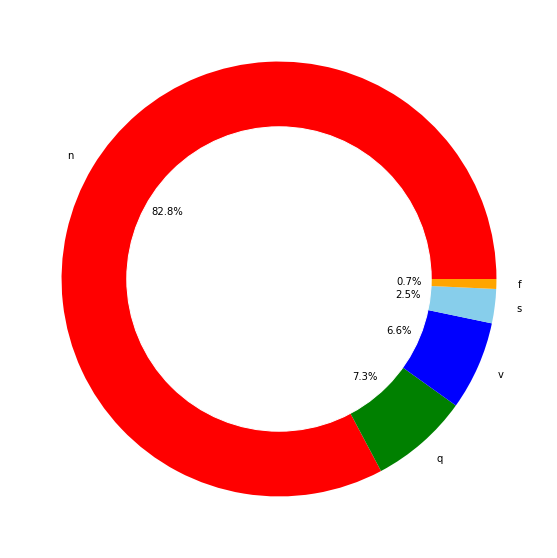

In [7]:
plt.figure(figsize=(20,10))

my_circle = plt.Circle( (0,0), 0.7, color='white')
plt.pie(equilibre, 
        labels=['n','q','v','s','f'], 
        colors=['red','green','blue','skyblue','orange'],
        autopct='%1.1f%%')

p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

- kita akan membuat seluruh class memiliki jumlah sample sebanyak 20000. 
- Sehingga untuk class `0` yang memiliki sample 72471, akan dilakukan pemilihan acak sebanyak 20000 dengan menggunakan Pandas Dataframe `.sample()`.
- Untuk class lainya, karena dibawah 20000 sample, akan diterapkan proses upsampling menjadi 20000 sample menggunakan sklearn `resample()`.

In [8]:
# sampling and resampling dataset

from sklearn.utils import resample
n_samples = 20000 
random_states = [42, 123, 124, 125, 126]

dfs = []

for i in range(len(equilibre)):
    dfs.append(train_df[train_df[187]==i])
    if(equilibre[i] > n_samples) :
        dfs[i]=dfs[i].sample(n=n_samples ,random_state=random_states[i])
    else :
        dfs[i]=resample(dfs[i],replace=True,n_samples=n_samples,random_state=random_states[i])

train_df=pd.concat(dfs)

In [9]:
train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
10153,0.162791,0.540698,0.755814,0.186047,0.168605,0.546512,0.616279,0.697674,0.651163,0.703488,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
33886,0.990066,0.938742,0.344371,0.034768,0.273179,0.331126,0.326159,0.341060,0.347682,0.347682,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
32005,0.974239,0.932084,0.590164,0.131148,0.014052,0.168618,0.238876,0.210773,0.196721,0.208431,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
56159,0.978495,0.723118,0.526882,0.298387,0.220430,0.158602,0.091398,0.091398,0.080645,0.083333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
61783,0.963351,0.709424,0.060209,0.013089,0.057592,0.041885,0.047120,0.034031,0.039267,0.044503,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


Sekarang kita memiliki dataset yang sudah balance.

In [10]:
# cek balanced dataset

equilibre=train_df[187].value_counts()

print(equilibre)

4    20000
3    20000
2    20000
1    20000
0    20000
Name: 187, dtype: int64


## Understanding ECG Signal
- Sekarang kita ambil 1 sample tiap class untuk melihat profile heart beat masing-masing class.
- Ini berguna untuk kita agar dapat memahami karakteristik sinyal ECG untuk tiap class.
- Task ini mudah dilakukan menggunakan pandas,  `.groupby()` pada kolom 187 (kolom class) dan dengan menggunakan fungsi `.apply()` kita ambil 1 sample data menggunakan `.sample()`.

In [11]:
ECG_PER_CLASS =train_df.groupby(187,group_keys=False).apply(lambda train_df : train_df.sample(1))

In [12]:
ECG_PER_CLASS

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
11247,0.991259,0.952797,0.414336,0.010490,0.096154,0.204545,0.232517,0.265734,0.284965,0.283217,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
74170,0.967643,0.964561,0.412943,0.000000,0.281972,0.359014,0.334361,0.317411,0.311248,0.309707,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
78062,0.017060,0.000000,0.028871,0.097113,0.186352,0.245407,0.309711,0.384514,0.429134,0.484252,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
80917,0.838590,0.925789,1.000000,0.781076,0.385900,0.198516,0.126160,0.105751,0.083488,0.079777,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
83070,0.938664,0.892662,0.851041,0.803943,0.725082,0.638554,0.537787,0.441402,0.365827,0.315444,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4


- Pertama kita plot tiap sample pada dataframe `ECG_PER_CLASS` menggunakan pandas `.plot()`.
- Setelah itu kita plot 2D histogram untuk keseluruhan sample ECG tiap class menggunakan fungsi `plot_hist()` yang kita buat dibawah.
- Pada plot histogram, daerah dengan intensitas lebih terang menandakan banyak titik sample pada waktu dan nilai ECG tersebut.
- Sebaliknya untuk daerah yang lebih gelap.

In [13]:
def plot_1_sample(class_number):
    data = ECG_PER_CLASS.iloc[class_number,:187]

    plt.plot(np.arange(0, len(data)*10, 10), data)
    plt.title("Plot 1 sample in class " + str(class_number))
    plt.xlabel("Time (ms)")
    plt.ylabel("Normalized Value")
    plt.show()

In [14]:
def plot_hist(class_number, min_, size):
    # filter data berdasarkan class_number 
    ECG=train_df.loc[train_df[187]==class_number].values

    # ambil data hanya pada kolom `min_` sampai `size`
    # convert ke 1D array
    ECG=ECG[:,min_:size]
    ECG_flatten=ECG.flatten()
    
    # generate time data untuk tiap kolom sample, 
    # ulang sebanyak ECG.shape[0]
    # scale x value (*10) agar bisa ditampilkan dalam satuam (ms)
    time = np.tile(np.arange(min_,size)*10, ECG.shape[0]) 

    # plot sebagai 2D histogram
    plt.hist2d(time, ECG_flatten, bins=(80,80), cmap=plt.cm.jet)
    plt.title("2D histogram on class " + str(class_number))
    plt.xlabel("Time (ms)")
    plt.ylabel("Normalized Value")
    plt.show()

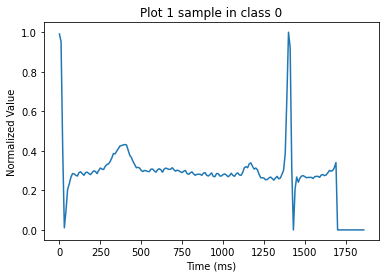

In [15]:
plot_1_sample(class_number=0)

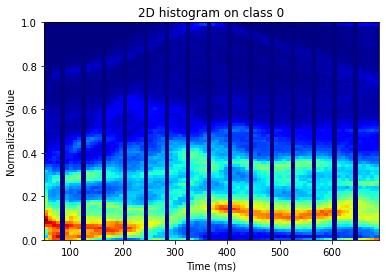

In [17]:
plot_hist(class_number=0, min_=5, size=70)

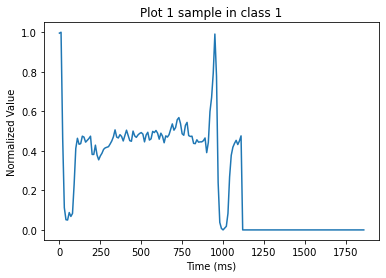

In [18]:
plot_1_sample(class_number=1)

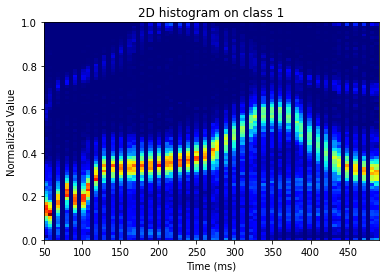

In [19]:
plot_hist(class_number=1, min_=5, size=50)

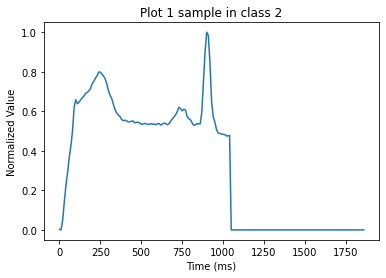

In [20]:
plot_1_sample(class_number=2)

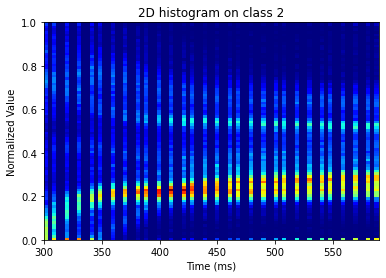

In [21]:
plot_hist(class_number=2, min_=30, size=60)

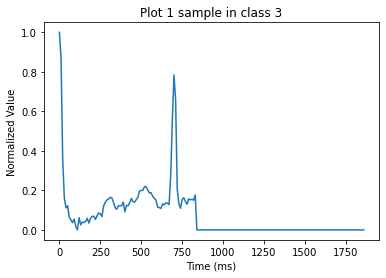

In [22]:
plot_1_sample(class_number=3)

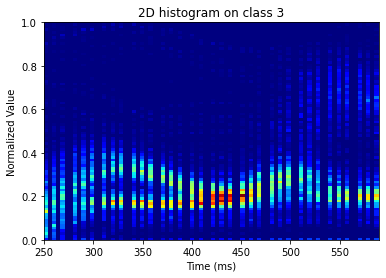

In [23]:
plot_hist(class_number=3, min_=25, size=60)

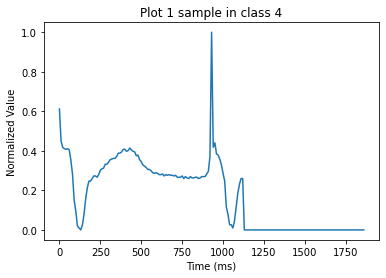

In [24]:
plot_1_sample(class_number=4)

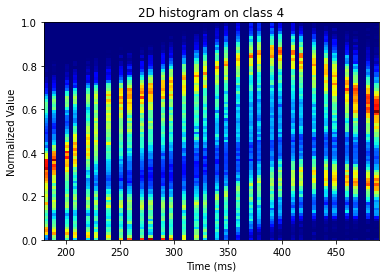

In [25]:
plot_hist(class_number=4, min_=18, size=50)

## Add Noise

- pada bagian ini kita tambahkan gaussian noise pada signal ECG 
- Noise yang akan ditambahkan adalah Additive White Gaussian Noise (AWGN)
- Pada AWGN nilai rata-rata $\mu$ = 0, sehingga untuk tiap Gaussian random variable $X$, non-central second [moment](https://en.wikipedia.org/wiki/Normal_distribution#Moments) *E*[$X^{2}$] adalah: \
\
*E*[$X^{2}$] = $\mu^{2}$ + $\sigma^{2}$ \
\
sehingga, \
*E*[$X^{2}$] = $\sigma^{2}$ \
\
untuk, \
*E*[$X^{2}$] dalam konteks ini merupakan rata-rata noise, \
\
$NoiseAvg$ = $10^{NoiseAvg[db]/10}$ \
\
konversi baliknya ke-db, \
$NoiseAvg[db] = 10\times log(NoiseAvg)$ \
\
NoiseAvg bisa didapatkan dari formula $SNR$, \
$SNR[db]= Signal[db] - NoiseAvg[db]$ 
\
\
sehingga jika $SNR$ diset pada nilai tertentu, bisa didapatkan variance $\sigma^{2}$ yang nantinya dapat digunakan untuk menghasilkan white noise. 

- untuk menghasilkan white noise bisa digunakan library `numpy.random.normal()` dengan parameter `step` = $\sigma$ (std deviation)

In [26]:
def add_AWGN_noise(signal, target_snr_db=18):
    
    # Calculate signal and convert to dB 
    sig_avg = np.mean(signal)
    sig_avg_db = 10 * np.log10(sig_avg)
    
    # Calculate noise : 
    # SNR_db = Signal_db - Noise_db
    noise_avg_db = sig_avg_db - target_snr_db
    noise_avg_watts = 10 ** (noise_avg_db / 10)
    
    # Generate an sample of white noise
    mean_noise = 0
    sigma = np.sqrt(noise_avg_watts)
    noise = np.random.normal(mean_noise, sigma, len(signal))

    return (signal+noise)

In [27]:
def plot_noised_signal(signal, noised_signal):
    plt.figure(figsize=(15,4)) 

    plt.subplot(1,2,1)
    plt.plot(signal)
    plt.title("Original Signal")

    plt.subplot(1,2,2)
    plt.plot(noised_signal)
    plt.title("Noised Signal with AWGN")

    plt.tight_layout()
    plt.show()

In [16]:
X_train=train_df.iloc[:,:187].values
X_test=test_df.iloc[:,:187].values

In [29]:
X_train_noised = train_df.iloc[:,:187].apply(add_AWGN_noise, axis=1).values
X_test_noised = test_df.iloc[:,:187].apply(add_AWGN_noise, axis=1).values

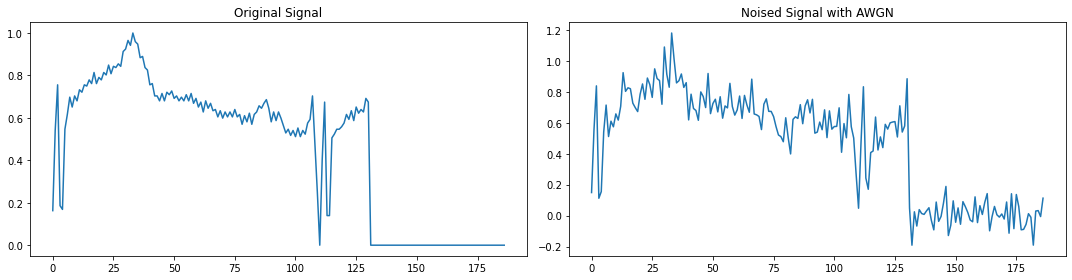

In [30]:
plot_noised_signal(X_train[0], X_train_noised[0])

### Save Model Adaptive Filtering

In [31]:
import pickle

def save_adapfilt_model(model, filename, path=""): 
    with open(os.path.join(path, filename), 'wb') as out_name:
        pickle.dump(model, out_name, pickle.HIGHEST_PROTOCOL)

def read_adapfilt_model(filename, path=""):
    with open(os.path.join(path, filename), 'rb') as in_name:
        model = pickle.load(in_name)
        return model

### Denoising Evaluation
- Sekarang kita akan evaluasi hasil denoising LMS diatas
- evaluasi dilakukan dengan cara mengitung SNR, RMS, EMSE
- SNR dihitung dengan cara, \
$SNR = \frac{\mu}{\sigma_{noise}}$ \
\
untuk, \
$\mu$ merupakan `mean` dari signal, \
$\sigma_{noise}$ merupakan `sandard deviation` dari noise 


- noise merupakan pengurangan signal ter-noise terhadap signal, \
$noise = signal - noisedSignal$

- Semakin besar nilai SNR, menandakan sedikitnya noise pada signal.
- Semakin kecil nilai MSE dan RMSE maka semakin sedikit noise setelah proses denoising.

In [32]:
def calc_snr(signal, noised_signal):
    #convert to dB 
    noise = signal - noised_signal
    std_noise = np.std(noise)
    signal_avg = np.mean(signal)
    
    SNR  = signal_avg/std_noise

    return SNR

## Denoising Signal

- Ditahap ini kita akan coba lakukan Denoising signal menggunakan beberapa teknik Adapive Filter seperti LMS, NLMS, RLS
- Selanjutnya di lakukan evaluasi denoising dengan menghitung SNR, MSE, dan RMSE
- Implementasi proses denoising signal di Python dapat dilakukan menggunakan library `padasip`
- Contoh penerapanya dapat dilihat disini : [Adaptive Signal Processing menggunakan Python](https://medium.com/@yunusmuhammad007/adaptive-signal-processing-menggunakan-python-44c341a453c3)


- Pertama kita akan coba terapkan denoising signal ECG menggunakan Adaptive FIlter LMS (least-mean-squares)

In [33]:
import padasip as pa

In [34]:
def denoising_adaptiveFilter(signal_list, noised_signal_list, model='lms', dim = 1):
    N = signal_list.shape[1]
    model_obj = pa.filters.AdaptiveFilter(model=model, n=dim, mu=0.1, w="random")
    output = []
    print('------------------- %s model training ----------------------' % model)
    for i, (signal, noised_signal) in enumerate(zip(signal_list, noised_signal_list)):
        x = np.reshape(signal, (N, dim))
        d = np.reshape(noised_signal, (N, dim))
        y, e, w = model_obj.run(d, x)
        output.append([y, e])
        
        # evaluate model
        snr= calc_snr(y, d)
        mse = pa.misc.MSE(e)
        rmse = pa.misc.RMSE(e)
        if i % 10000 == 0 :
            print("sample %d \t : SNR %.4f, MSE %.4f, RMSE %.4f" % (i, snr, mse, rmse))
    return output, model_obj

- Generate model Adaptive Filtering

In [35]:
lms_output, model_lms = denoising_adaptiveFilter(X_train, X_train_noised, model='lms', dim = 1)

------------------- lms model training ----------------------
sample 0 	 : SNR 0.8839, MSE 0.0252, RMSE 0.1587
sample 10000 	 : SNR 0.4623, MSE 0.0022, RMSE 0.0474
sample 20000 	 : SNR 0.7062, MSE 0.0027, RMSE 0.0519
sample 30000 	 : SNR 1.5167, MSE 0.0045, RMSE 0.0668
sample 40000 	 : SNR 0.6553, MSE 0.0028, RMSE 0.0530
sample 50000 	 : SNR 0.7502, MSE 0.0056, RMSE 0.0748
sample 60000 	 : SNR 0.3704, MSE 0.0015, RMSE 0.0382
sample 70000 	 : SNR 0.3878, MSE 0.0014, RMSE 0.0370
sample 80000 	 : SNR 0.7651, MSE 0.0051, RMSE 0.0717
sample 90000 	 : SNR 0.7705, MSE 0.0033, RMSE 0.0572


In [37]:
nlms_output, model_nlms = denoising_adaptiveFilter(X_train, X_train_noised, model='nlms', dim = 1)

------------------- nlms model training ----------------------
sample 0 	 : SNR 0.6495, MSE 0.1060, RMSE 0.3256
sample 10000 	 : SNR 0.4626, MSE 0.0022, RMSE 0.0474
sample 20000 	 : SNR 0.7054, MSE 0.0027, RMSE 0.0519
sample 30000 	 : SNR 1.5180, MSE 0.0045, RMSE 0.0668
sample 40000 	 : SNR 0.6562, MSE 0.0028, RMSE 0.0531
sample 50000 	 : SNR 0.7505, MSE 0.0056, RMSE 0.0750
sample 60000 	 : SNR 0.3707, MSE 0.0015, RMSE 0.0383
sample 70000 	 : SNR 0.3878, MSE 0.0014, RMSE 0.0370
sample 80000 	 : SNR 0.7652, MSE 0.0051, RMSE 0.0715
sample 90000 	 : SNR 0.7724, MSE 0.0033, RMSE 0.0573


In [42]:
rls_output, model_rls = denoising_adaptiveFilter(X_train, X_train_noised, model='rls', dim = 1)

------------------- rls model training ----------------------
sample 0 	 : SNR 0.9597, MSE 0.0130, RMSE 0.1142
sample 10000 	 : SNR 0.5171, MSE 0.0075, RMSE 0.0869
sample 20000 	 : SNR 0.7866, MSE 0.0063, RMSE 0.0793
sample 30000 	 : SNR 1.7056, MSE 0.0112, RMSE 0.1060
sample 40000 	 : SNR 0.7267, MSE 0.0079, RMSE 0.0890
sample 50000 	 : SNR 0.8375, MSE 0.0231, RMSE 0.1521
sample 60000 	 : SNR 0.4085, MSE 0.0043, RMSE 0.0656
sample 70000 	 : SNR 0.4331, MSE 0.0039, RMSE 0.0626
sample 80000 	 : SNR 0.8437, MSE 0.0170, RMSE 0.1304
sample 90000 	 : SNR 0.8593, MSE 0.0090, RMSE 0.0947


- Save model

In [38]:
save_adapfilt_model(model_lms, "LMS_adapfilt_model.pkl")

In [39]:
save_adapfilt_model(model_nlms, "NLMS_adapfilt_model.pkl")

In [43]:
save_adapfilt_model(model_rls, "RLS_adapfilt_model.pkl")

- Load model LMS

In [44]:
model_lms = read_adapfilt_model("LMS_adapfilt_model.pkl")

In [45]:
model_nlms = read_adapfilt_model("NLMS_adapfilt_model.pkl")

In [46]:
model_rls = read_adapfilt_model("RLS_adapfilt_model.pkl")

- Denoising test dataset

In [47]:
lms_predict_vec = np.vectorize(model_lms.predict)
X_test_denoised_lms = lms_predict_vec(X_test_noised)

In [48]:
nlms_predict_vec = np.vectorize(model_nlms.predict)
X_test_denoised_nlms = nlms_predict_vec(X_test_noised)

In [49]:
rls_predict_vec = np.vectorize(model_rls.predict)
X_test_denoised_rls = rls_predict_vec(X_test_noised)

- Plot Result

In [57]:
def plot_denoising(d, y, x, e, model='lms'):
    # show results
    snr= calc_snr(y, d)
    mse = pa.misc.MSE(e)
    rmse = pa.misc.RMSE(e)
        
    plt.figure(figsize=(15,5))
    
    plt.subplot(1,2,1)
    plt.grid()
    plt.title("Adaptation Result %s | SNR : %.4f, MSE : %.4f, RMSE : %.4f" % (model.upper(), snr, mse, rmse))
    plt.xlabel("samples - n")
    plt.plot(d,"b", label="d - denoised signal")
    plt.plot(y,"g", label="y - original signal")
    plt.plot(x,"r", label="x - noised signal")
    plt.legend()

    plt.subplot(1,2,2)
    plt.grid()
    plt.title("Filter Error Graph")
    plt.xlabel("samples - n")
    plt.plot(10*np.log10(e**2),"r", label="e - error [dB]")
    plt.legend()

    plt.tight_layout()
    plt.show()

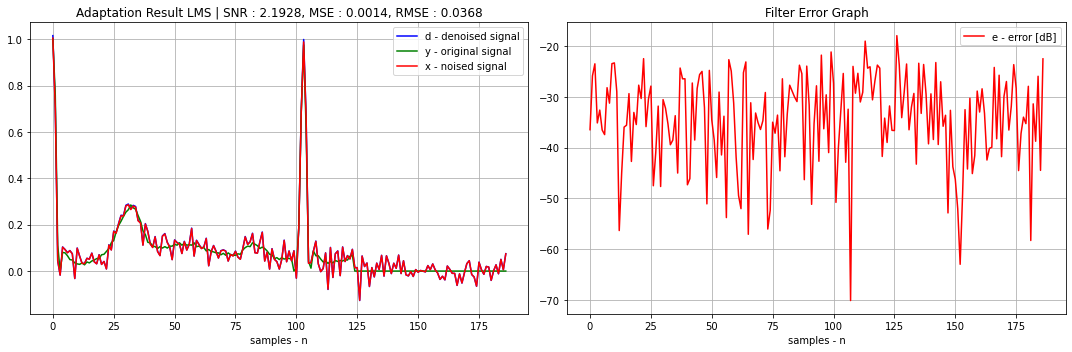

In [58]:
idx = 0
e = X_test_denoised_lms[idx] - X_test[idx]
d = X_test_denoised_lms[idx]
y = X_test[idx]
x = X_test_noised[idx]

plot_denoising(d, y, x, e, model='lms')

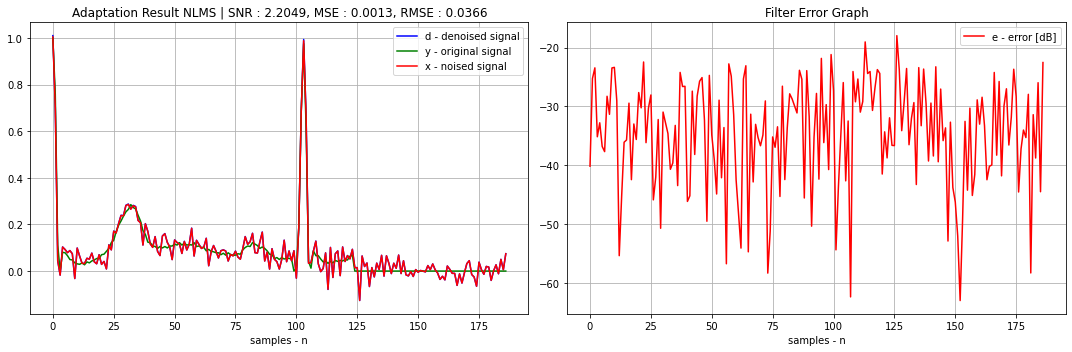

In [59]:
idx = 0
e = X_test_denoised_nlms[idx] - X_test[idx]
d = X_test_denoised_nlms[idx]
y = X_test[idx]
x = X_test_noised[idx]

plot_denoising(d, y, x, e, model='nlms')

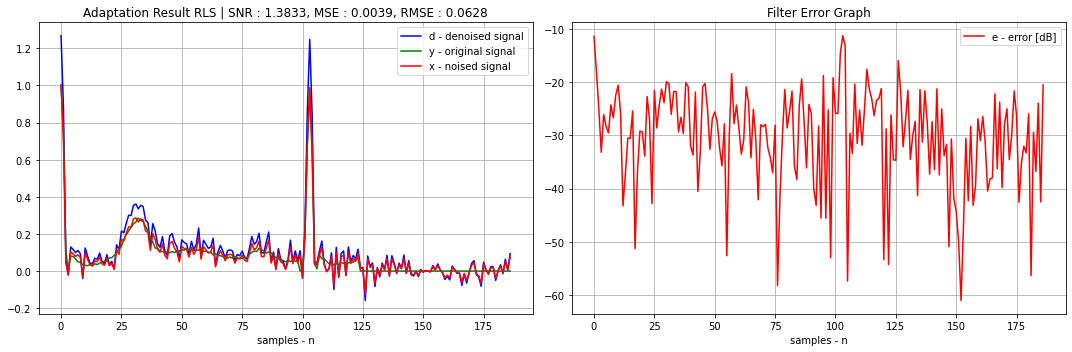

In [60]:
idx = 0
e = X_test_denoised_rls[idx] - X_test[idx]
d = X_test_denoised_rls[idx]
y = X_test[idx]
x = X_test_noised[idx]

plot_denoising(d, y, x, e, model='rls')

___
___
___

## Building Convolutional Neural Network

- Import Keras library

In [17]:
from keras.models import Sequential

from keras.layers import Dense, Conv1D, MaxPool1D, Flatten, Dropout
from keras.layers import Input
from keras.models import Model
from keras.layers.normalization import BatchNormalization
from keras.callbacks import EarlyStopping, ModelCheckpoint

import keras


- Prepare training set dan test set

In [18]:
target_train=train_df[187]
target_test=test_df[187]
y_train=to_categorical(target_train)
y_test=to_categorical(target_test)

In [19]:
X_train=train_df.iloc[:,:186].values
X_test=test_df.iloc[:,:186].values

X_train = X_train.reshape(len(X_train), X_train.shape[1],1)
X_test = X_test.reshape(len(X_test), X_test.shape[1],1)

- Buat CNN Model dengan aritektur network : 
`CONV-POOL-CONV-POOL-CONV-POOL-FC`
- CONV : 1D Convolutional Layer
- POOL : MAX Pooling Layer
- FC   : Dense Layer + Activation

In [20]:
def cnn_model(max_len):
    
    model = Sequential()
    
    model.add(Conv1D(filters=64,
                     kernel_size=6,
                     activation='relu',
                     input_shape=(max_len, 1)))
    model.add(BatchNormalization())
    model.add(MaxPool1D(pool_size=3,
                        strides=2,
                        padding='same'))
    
    
    model.add(Conv1D(filters=64,
                     kernel_size=6,
                     activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPool1D(pool_size=2,
                        strides=2,
                        padding='same'))
    
    
    model.add(Conv1D(filters=64,
                     kernel_size=3,
                     activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPool1D(pool_size=2,
                        strides=2,
                        padding='same'))
    
    
    # Fully Connected layer (FC)
    model.add(Flatten())
    model.add(Dense(64, 
                    activation='relu'))
    model.add(Dense(32, 
                    activation='relu'))
    model.add(Dense(5, 
                    activation='softmax'))
              
    model.summary()
    model.compile(optimizer='adam', 
                  loss='categorical_crossentropy',
                  metrics = ['accuracy'])

    return model

- sekarang kita akan melakukan proses training model dengan memanfaatkan `.fit()` pada model yang kita buat diatas.
- selain itu kita gunakan juka teknik `EarlyStoping()` untuk menghentikan proses training jika terjadi divergensi pada validation data yang diakibatkan oleh overfitting. 
- pada `EarlyStoping()` kita gunakan parmeter `patience=8` yang artinya jika proses training untuk 8 epoch tidak terjadi peningkatan maka hentikan proses training.

In [21]:
def check_model(model_, x, y, x_val, y_val, epochs_, batch_size_):
    callbacks = [EarlyStopping(monitor='val_loss', patience=4),
                 ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)]

    hist = model_.fit(x, 
                      y,
                      epochs=epochs_,
                      callbacks=callbacks, 
                      batch_size=batch_size_,
                      validation_data=(x_val,y_val))
    model_.load_weights('best_model.h5')
    return hist 

- jalankanproses training dengan `EPOCH` sebanyak 10 dan `BATCH_SIZE` sebesar 32

In [ ]:
max_len = X_train.shape[1]  

EPOCHS = 10
BATCH_SIZE = 32

model = cnn_model(max_len)
history=check_model(model, X_train,y_train,X_test,y_test, EPOCHS, BATCH_SIZE)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 181, 64)           448       
_________________________________________________________________
batch_normalization_1 (Batch (None, 181, 64)           256       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 91, 64)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 86, 64)            24640     
_________________________________________________________________
batch_normalization_2 (Batch (None, 86, 64)            256       
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 43, 64)            0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 41, 64)            12352     
__________

- Save model

In [ ]:
model.save("cnn_model_final.h5")

# Evaluate Model

- Plot Accuracy vs Epochs
- Plot Loss vs Epochs
- Plot Confusion Matrix

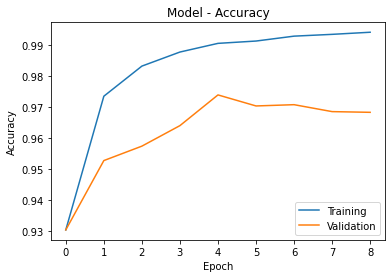

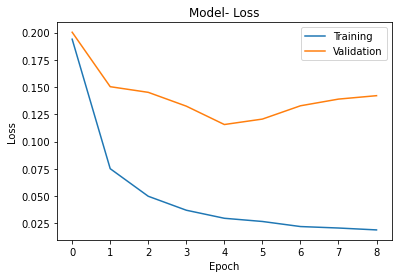

In [70]:
def evaluate_model(history, X_test, y_test):
    
    fig1, ax_acc = plt.subplots()
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Model - Accuracy')
    plt.legend(['Training', 'Validation'], loc='lower right')
    plt.show()
    
    fig2, ax_loss = plt.subplots()
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Model- Loss')
    plt.legend(['Training', 'Validation'], loc='upper right')
    plt.show()

evaluate_model(history, X_test, y_test)    

- Dari hasil diatas kita bisa melihat jika akurasi training set = 0.99, sedangkan untuk akurasi validation set = 0.97
- Untuk plot loss training set = 0.01 sedangkan untuk loss validation set = 0.13

In [71]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(10, 10))
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

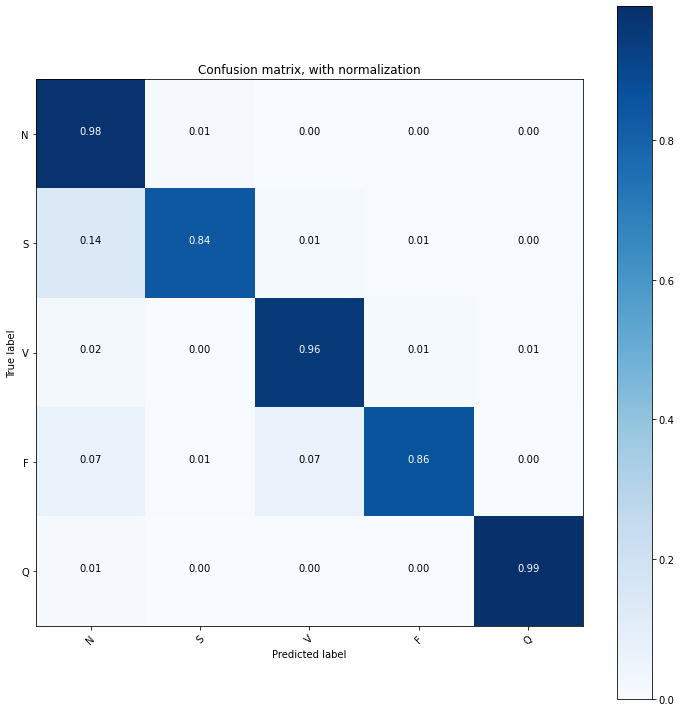

In [72]:
# predict test data
y_pred=model.predict(X_test)


# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plot_confusion_matrix(cnf_matrix, classes=['N', 'S', 'V', 'F', 'Q'],normalize=True,
                      title='Confusion matrix, with normalization')


- dari hasil plot confusion matrix, dapat dilihat tiap kelas memiliki banyak TRUE POSITIVE predicted data
- semakin gelap kebiruan menunjukan banyaknya hasil predicted label untuk true label tersebut

In [73]:
print(classification_report(y_test.argmax(axis=1), 
                            y_pred.argmax(axis=1), 
                            target_names=['N', 'S', 'V', 'F', 'Q']))

              precision    recall  f1-score   support

           N       0.99      0.98      0.99     18118
           S       0.71      0.84      0.77       556
           V       0.94      0.96      0.95      1448
           F       0.56      0.86      0.68       162
           Q       0.97      0.99      0.98      1608

    accuracy                           0.97     21892
   macro avg       0.83      0.92      0.87     21892
weighted avg       0.98      0.97      0.98     21892



- Jika kita lihat, nilai report untuk seluruh klas bjuga bagus, 
- Nilai recall dan precission juga tinggi, menunjukan model mampu memprediksi data dengan baik untuk seluruh data pada sclass tersebut 